In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import math
%matplotlib inline

In [143]:
#df = pd.read_csv("/home/hp/Desktop/College/Sem5/DA/Project/zomato-bangalore-restaurants/zomato.csv")
mylist = []

for chunk in  pd.read_csv("/home/hp/Desktop/College/Sem5/DA/Project/zomato-bangalore-restaurants/zomato.csv", sep=',', chunksize=20000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)


del mylist

In [144]:
df = big_data

In [145]:
to_drop = ['url',
           'phone',
           'address',
           'dish_liked',
           'reviews_list',
           'menu_item',
           'listed_in(city)',
           'votes']
df.drop(to_drop, inplace=True, axis=1)
print(df.columns.values)

['name' 'online_order' 'book_table' 'rate' 'location' 'rest_type'
 'cuisines' 'approx_cost(for two people)' 'listed_in(type)']


In [146]:
#remove all , in the approx_cost(for two people) column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [147]:
#convert all num/5 from rating to just num
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x:x.split('/')[0])
# Dealing with instanced with 'NEW'
df['rate'] = df['rate'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['rate'] = df['rate'].apply(lambda x: x.replace('-', str(np.nan)))
df['rate'] = df['rate'].astype(float)

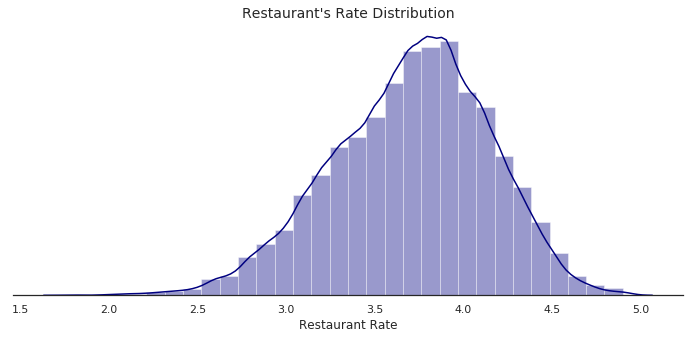

In [9]:
bangalore_rest = df.copy()
sns.set(style='white', palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(12, 5))
sns.despine(left=True)
sns.distplot(bangalore_rest['rate'], bins=30, color='navy')
ax.set_title("Restaurant's Rate Distribution", size=14)
ax.set_xlabel('Restaurant Rate')
plt.setp(ax, yticks=[])
plt.show()

In [148]:
bangalore_rest = df.copy()
bangalore_rest.isnull().sum()

#Need to handle missing data
#As there are a lot missing values for column rate we cannot drop it.
#we propose a solution by predicting the rating of these missing values by using KNN
#This is a temprovary solution based on the performance final approach might change


name                               0
online_order                       0
book_table                         0
rate                           10052
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [149]:
#Too many cusines group them based on the frequency of the cusines as a whole
#If there are multiple cuisines are present pick 2 with most frequency
all_cuisines = dict()
for j in bangalore_rest['cuisines']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in all_cuisines:
            all_cuisines[i] = 1
        else:
            all_cuisines[i] = all_cuisines[i] + 1
#print(sorted(popular_cusines.items(), key=operator.itemgetter(1))[::-1])
#drop all cuisines with less than 500 frequency

cuisines_todel = []
for i in all_cuisines:
    if all_cuisines[i] < 500:
        cuisines_todel.append(i)

for i in bangalore_rest:
    print(i)

name
online_order
book_table
rate
location
rest_type
cuisines
approx_cost(for two people)
listed_in(type)


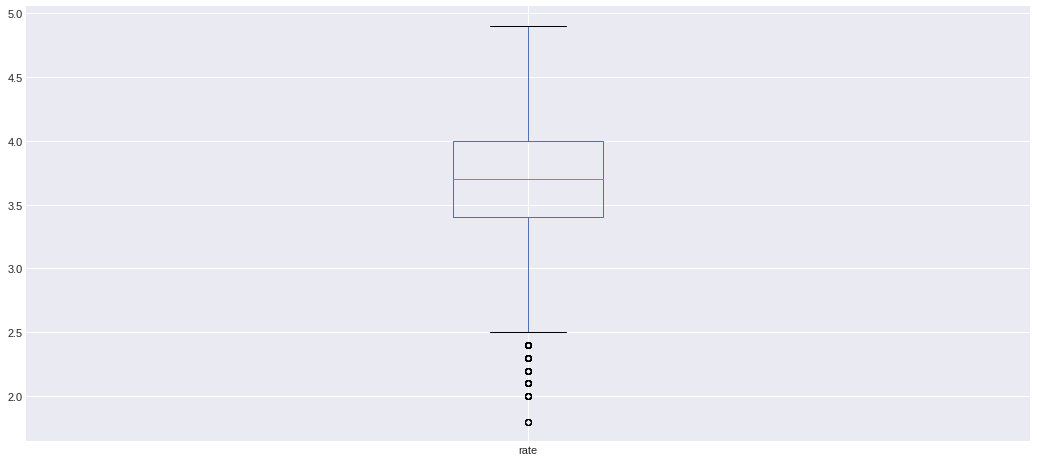

In [150]:
fig, ax = plt.subplots(figsize=(18, 8))
bx = bangalore_rest.boxplot('rate')
#we see that there are a few outliers below rating 2.5

In [151]:
c1 = 0
for i in bangalore_rest['rate']:
    if(i<2.5):
        c1+=1
print(c1)

187


In [159]:
#since there are only 187 outliers we can drop them
bangalore_rest2 = bangalore_rest.copy()
bangalore_rest2['rate'].fillna((bangalore_rest2['rate'].median()), inplace=True)
bangalore_rest2.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
listed_in(type)                  0
dtype: int64

In [163]:
bangalore_rest2 = bangalore_rest2[bangalore_rest2.rate >= 2.5]
bangalore_rest2.head()
bangalore_rest,bangalore_rest2 = bangalore_rest2,bangalore_rest

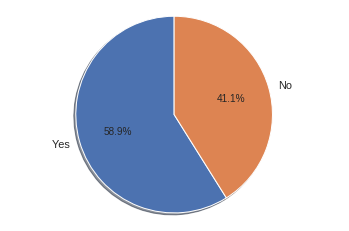

In [164]:
#visualising online_order and book_table data
labels = ['Yes','No']
values = [list(bangalore_rest['online_order']).count('Yes'), list(bangalore_rest['online_order']).count('No')]
fig1, ax1 = plt.subplots()
explode = [0,0]
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

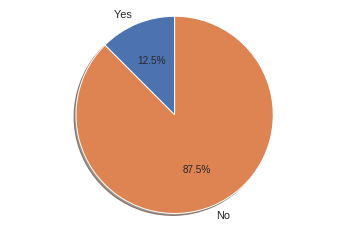

In [165]:
labels = ['Yes','No']
values = [list(bangalore_rest['book_table']).count('Yes'), list(bangalore_rest['book_table']).count('No')]
fig1, ax1 = plt.subplots()
explode = [0,0]
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

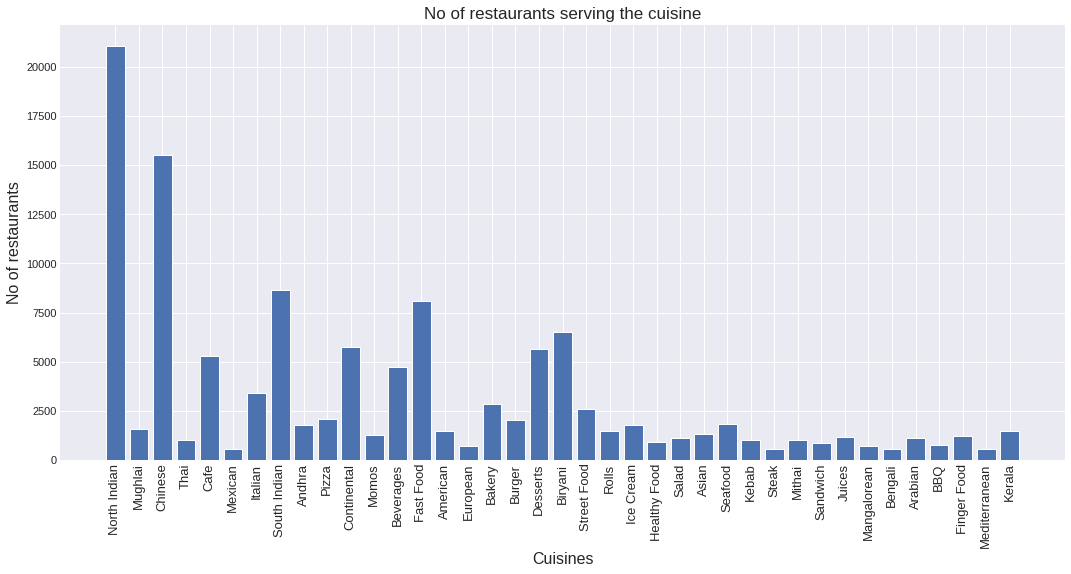

In [166]:
#plot bar charts top cuisines 
popular_cuisines = all_cuisines.copy()
labels = []
freq = [] 
for i in cuisines_todel:
    del popular_cuisines[i]
#popular_cuisines contains all the cuisines which have frequency > 500

fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(range(len(popular_cuisines)), list(popular_cuisines.values()))
plt.xticks(range(len(popular_cuisines)), list(popular_cuisines.keys()),fontsize=13, rotation=90)
plt.xlabel('Cuisines', fontsize=16)
plt.ylabel('No of restaurants', fontsize=16)
plt.title('No of restaurants serving the cuisine',fontsize=17)
plt.show()


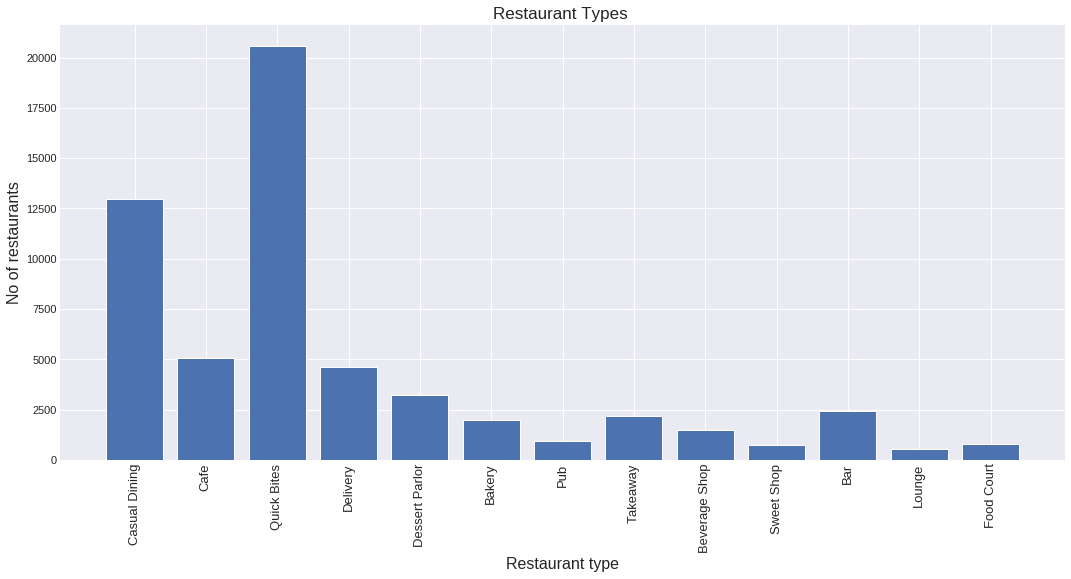

In [167]:
#bar graph for restaurant type
all_types = dict()
for j in bangalore_rest['rest_type']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in all_types:
            all_types[i] = 1
        else:
            all_types[i] = all_types[i] + 1
todel_type = []
for i in all_types:
    if(all_types[i] < 500):
        todel_type.append(i)
        
for i in todel_type:
    del all_types[i]
#print(all_types)
#all_types contains all the types of restaurants available
fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(range(len(all_types)), list(all_types.values()))
plt.xticks(range(len(all_types)), list(all_types.keys()),fontsize=13, rotation=90)
plt.xlabel('Restaurant type', fontsize=16)
plt.ylabel('No of restaurants', fontsize=16)
plt.title('Restaurant Types ',fontsize=17)
plt.show()

#check if we want to set a threshold for this. 
#need to handle missing data

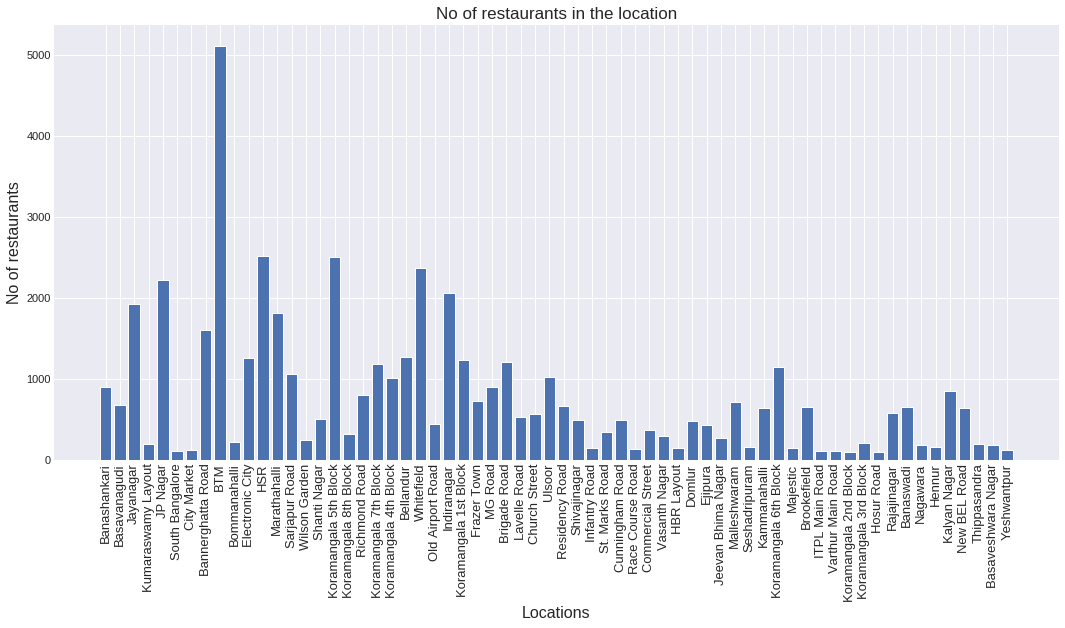

In [168]:
#bar graph for location

all_loc = dict()
for j in bangalore_rest['location']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in all_loc:
            all_loc[i] = 1
        else:
            all_loc[i] = all_loc[i] + 1
#Set the popular threshold. Here the Threshoold is 100
popular_loc = all_loc.copy()
for i in all_loc:
    if(all_loc[i] < 100):
        del popular_loc[i]

#Also handle missing data
fig, ax = plt.subplots(figsize=(18, 8))
plt.bar(range(len(popular_loc)), list(popular_loc.values()))
plt.xticks(range(len(popular_loc)), list(popular_loc.keys()),fontsize=13, rotation=90)
plt.xlabel('Locations', fontsize=16)
plt.ylabel('No of restaurants', fontsize=16)
plt.title('No of restaurants in the location',fontsize=17)
plt.show()


In [169]:
#split rest type to rest type 1 and rest type 2 and split cusines to cuisine 1 and cuisine 2 this will end phase1.

In [170]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

temp = list(bangalore_rest['cuisines'])
picked1 = []
picked2 = []

transformed_df = bangalore_rest.copy()

for i in range(len(bangalore_rest)):
    try:
        inter = intersection(list(map(lambda x:x.strip(),temp[i].split(','))),list(popular_cuisines.keys()))
        var1 = sorted(list(map(lambda x: popular_cuisines[x], inter)))[::-1]
        if len(var1)==0:
            picked1.append(-1)
            picked2.append(-1)
            continue

        if len(var1)==1:
            var1.append(var1[0])

        for i in popular_cuisines:
            if(popular_cuisines[i] == var1[0]):
                picked1.append(i)
                break

        for i in popular_cuisines:
            if(popular_cuisines[i] == var1[1]):
                picked2.append(i)
                break
    except:
        picked1.append(-1)
        picked2.append(-1)

transformed_df.insert(9, "Cuisine1", picked1, True)
transformed_df.insert(10, "Cuisine2", picked2, True)
transformed_df.drop(['cuisines'], inplace=True, axis=1)

transformed_df = transformed_df[transformed_df.Cuisine1 != -1]
transformed_df = transformed_df[transformed_df.Cuisine2 != -1]

transformed_df.head()


,name,online_order,book_table,rate,location,rest_type,approx_cost(for two people),listed_in(type),Cuisine1,Cuisine2
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,800.0,Buffet,North Indian,Chinese
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,800.0,Buffet,North Indian,Chinese
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Cafe,Italian
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,300.0,Buffet,North Indian,South Indian
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,600.0,Buffet,North Indian,North Indian


In [171]:
temp = list(df['rest_type'])
transformed_df2 = transformed_df.copy()
popular_type = all_types
picked_rest = []
for i in range(len(transformed_df2)):
    try:
        inter = intersection(list(map(lambda x:x.strip(),temp[i].split(','))),list(popular_type.keys()))
        var1 = sorted(list(map(lambda x: popular_type[x], inter)))[::-1]
        if len(var1)==0:
            picked_rest.append(-1)
            continue
            
        for i in popular_type:
            if(popular_type[i] == var1[0]):
                picked_rest.append(i)
                break
    except:
        picked_rest.append(-1)
        
transformed_df2.insert(10, "rest1", picked_rest, True)
transformed_df2.drop(['rest_type'], inplace=True, axis=1)
transformed_df = transformed_df2[transformed_df2.rest1 != -1]
transformed_df2.head()

,name,online_order,book_table,rate,location,approx_cost(for two people),listed_in(type),Cuisine1,Cuisine2,rest1
0,Jalsa,Yes,Yes,4.1,Banashankari,800.0,Buffet,North Indian,Chinese,Casual Dining
1,Spice Elephant,Yes,No,4.1,Banashankari,800.0,Buffet,North Indian,Chinese,Casual Dining
2,San Churro Cafe,Yes,No,3.8,Banashankari,800.0,Buffet,Cafe,Italian,Casual Dining
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,300.0,Buffet,North Indian,South Indian,Quick Bites
4,Grand Village,No,No,3.8,Basavanagudi,600.0,Buffet,North Indian,North Indian,Casual Dining
